# Hands-On

## Hands-On 1

Here we are going to compare the performance of one model under different imputations of the data.

1. Get the data from https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv
Hint: use pandas as df = pd.read_csv(,header=None)

Features:

    0. Number of times pregnant.
    1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
    2. Diastolic blood pressure (mm Hg).
    3. Triceps skinfold thickness (mm).
    4. 2-Hour serum insulin (mu U/ml).
    5. Body mass index (weight in kg/(height in m)^2).
    6. Diabetes pedigree function.
    7. Age (years).
    8. Class variable (0 or 1).

2. Inspect the data using *describe*

3. Replace the 0 values in the first 5 feature columns as:  
 *df[[0,1,2,3,4]] = df[[0,1,2,3,4]].replace(0, np.nan)*

4. Fit a binary classifier for predicting the 8 column.

5. Perform some imputation on the dataset obtained in the part 3. Fit your model again, do the accuracy improves?

In [68]:
%matplotlib inline
!pip install mglearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import mglearn
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

In [94]:
URL='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
df = pd.read_csv(URL, header=None)
df.head(100)

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
95,6,144,72,27,228,33.9,0.255,40,0
96,2,92,62,28,0,31.6,0.130,24,0
97,1,71,48,18,76,20.4,0.323,22,0
98,6,93,50,30,64,28.7,0.356,23,0


In [95]:
description=df.describe()
print(description)

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

                6           7           8  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [96]:
df[[0,1,2,3,4]] = df[[0,1,2,3,4]].replace(0, np.nan)

In [117]:
from sklearn.impute import KNNImputer
nan = np.nan
X = df
print(np.array(X))
print('\n')
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(X)


[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]




array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [118]:
! pip install impyute
from impyute.imputation.cs import fast_knn
nan = np.nan
X = df

print(fast_knn(np.array(X), k=3))

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [119]:
print(fast_knn(np.array(X), k=2))

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [120]:
from impyute.imputation.cs import mice

print(np.array(X))
print("")
print(mice(np.array(X)))

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


## Hands-on 2

Walk throught the Keras example with colab  
https://keras.io/examples/timeseries/timeseries_anomaly_detection/  
Click on the 'view in colab' and walk it through

###### it detect anomaly very well

## Hands-on 3
1. Use the get_dataset() function defined before to generate data  
2. Use an outlier detection method mentioned before to manually find outliers  
3. Rule out the outliers  
4. fit a linear regression  
5. plot results  

In [121]:
from random import random
from random import randint
from random import seed
from sklearn.datasets import make_regression
from matplotlib import pyplot
 
# prepare the dataset
def get_dataset():
	X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
	# add some artificial outliers
	seed(1)
	for i in range(10):
		factor = randint(2, 4)
		if random() > 0.5:
			X[i] += factor * X.std()
		else:
			X[i] -= factor * X.std()
	return X, y

(100, 1) (100,)


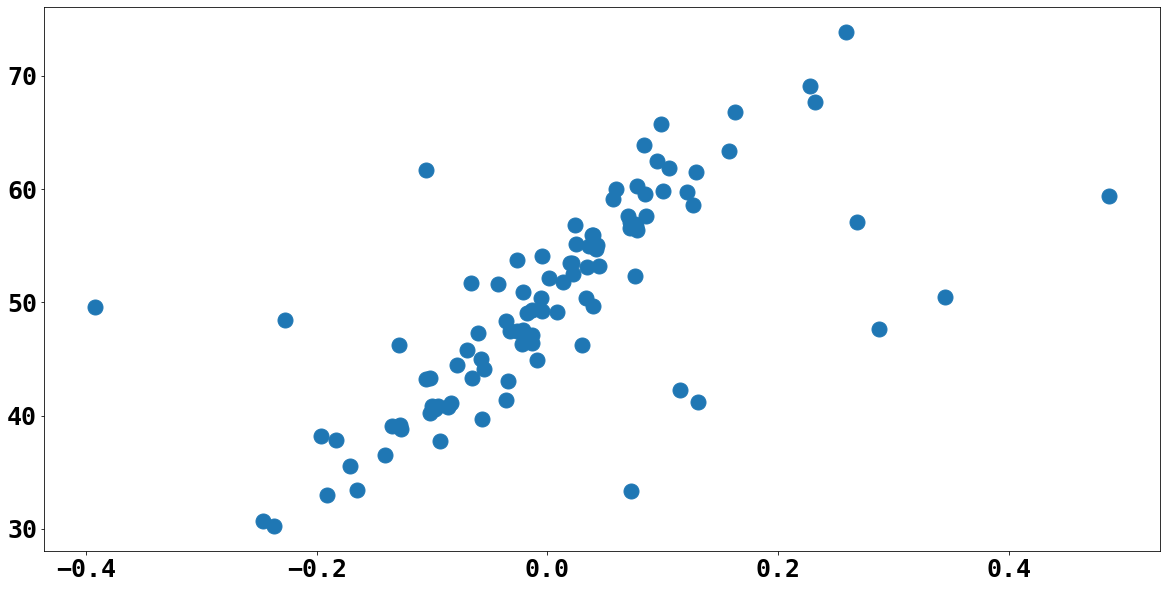

In [122]:
# load dataset
X, y = get_dataset()
# summarize shape
print(X.shape, y.shape)
# scatter plot of input vs output
pyplot.scatter(X, y)
pyplot.show()

In [123]:
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# prepare the dataset
def get_dataset():
	X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
	# add some artificial outliers
	seed(1)
	for i in range(10):
		factor = randint(2, 4)
		if random() > 0.5:
			X[i] += factor * X.std()
		else:
			X[i] -= factor * X.std()
	return X, y

In [124]:
# evaluate a model
def evaluate_model(X, y, model):
	# define model evaluation method
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
	# force scores to be positive
	return absolute(scores)
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fut the model on all data
	model.fit(X, y)
	# plot the dataset
	pyplot.scatter(X, y)
	# plot the line of best fit
	xaxis = arange(X.min(), X.max(), 0.01)
	yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
	pyplot.plot(xaxis, yaxis, color='r')
	# show the plot
	pyplot.title(type(model).__name__)
	pyplot.show()

Mean MAE: 5.260 (1.149)


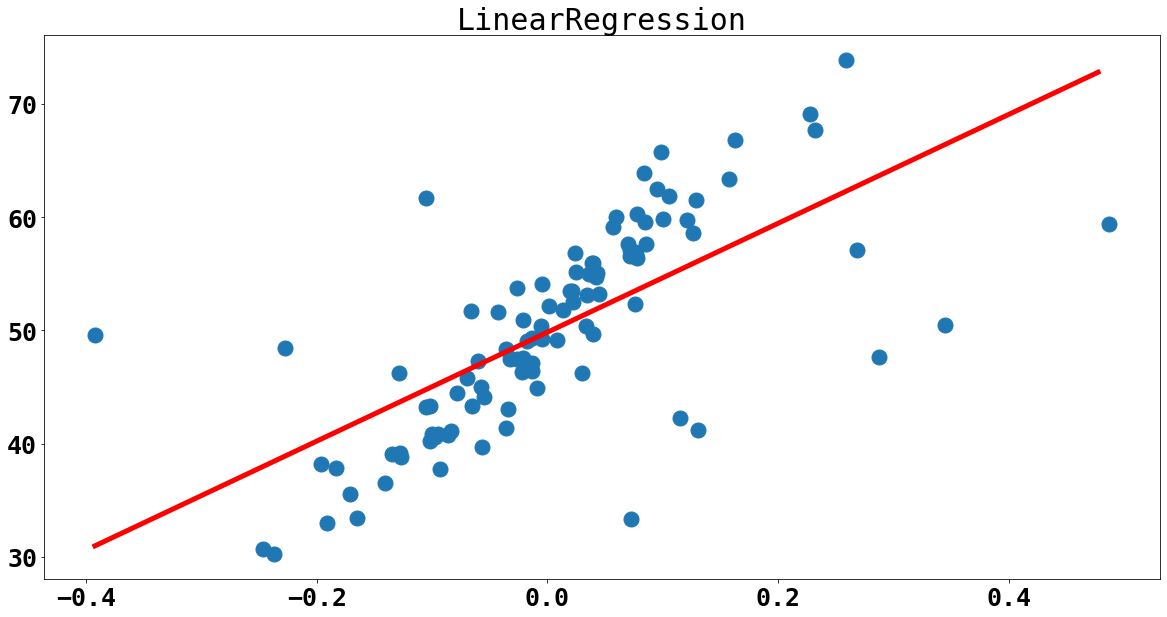

In [125]:
# load dataset
X, y = get_dataset()
# define the model
model = LinearRegression()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit
plot_best_fit(X, y, model)